In [135]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Read Students Data (Export csv from excel file)

In [136]:
students_data = pd.read_csv('university_translated_students.csv')
students_data.head()

,STUDENT_ID,TITLE_NAME,FIRST_NAME,LAST_NAME,GENDER,AGE_1_YEAR,ZIP_CODE,DEPARTMENT_ID,YEAR_ADMIT,SEMESTER_ADMIT,STATUS,GPA
0,3505,นาย,ชาลี,ทั1764,m,21,3,5,2541,3,G,2.0
1,3600,นาย,สุรชัย,พิ1839,m,21,5,3,2544,3,A,3.0
2,3696,นาย,วิกร,อั1684,m,22,3,4,2541,1,G,3.0
3,3792,นาย,สมเกียรติ,เจ1558,m,22,4,6,2541,1,G,3.0
4,3887,นาย,เอกศักดิ์,ยั1568,m,19,2,3,2544,2,A,3.0


# Exploration Data Analytics (EDA)

## Q1 good students graduated.

In [137]:
good_students = students_data[students_data['GPA'] >= 3.0]
good_students['STATUS'].value_counts()
# G = graduated = 1439

,count
STATUS,
G,1439
A,551


## Q2 bad students graduated.

In [138]:
bad_students = students_data[students_data['GPA'] < 3.0]
bad_students['STATUS'].value_counts()
# G = graduated = 846

,count
STATUS,
G,846
R,166
A,147


## Q3 Count Each Department
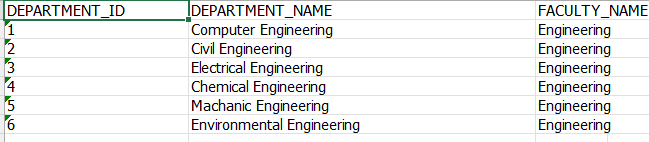

In [139]:
good_students = students_data[students_data['GPA'] >= 3.0]
good_students['DEPARTMENT_ID'].value_counts()

,count
DEPARTMENT_ID,
3,749
6,395
4,354
2,235
5,145
1,112


## Q4 Imbalance checking

In [140]:
first_year_students_data = students_data
print(first_year_students_data['DEPARTMENT_ID'].value_counts())
majority_class_count = first_year_students_data['DEPARTMENT_ID'].value_counts().max()
minority_class_ciunt = sum(first_year_students_data['DEPARTMENT_ID'].value_counts()) - majority_class_count
print("MAJORITY CLASS COUNT =",majority_class_count)
print("MINORITY CLASS COUNT =",minority_class_ciunt)
# imbalance ratio
print("IMBALANCE RATIO =",minority_class_ciunt/majority_class_count)

DEPARTMENT_ID
3    1220
2     588
6     549
4     523
5     272
1     257
Name: count, dtype: int64
MAJORITY CLASS COUNT = 1220
MINORITY CLASS COUNT = 2189
IMBALANCE RATIO = 1.794262295081967


## Q5 Status N count

In [141]:
len(students_data[students_data['STATUS'] == 'N'])

260

# Data Pre-processing

Read first year subject grade

In [142]:
students_grade = pd.read_csv('university_translated_students_grade.csv')
students_grade.head()

,STUDENT_ID,GRADE_204111,GRADE_204222,GRADE_204333,GRADE_204444,GRADE_204555,GRADE_204666
0,5894,3.5,3.0,3.0,2.5,2.5,4.0
1,5448,3.5,3.0,4.0,4.0,3.0,2.5
2,5658,3.5,3.0,2.5,4.0,3.5,4.0
3,3710,3.5,4.0,2.5,2.5,4.0,2.5
4,3932,3.5,4.0,2.5,2.5,4.0,3.5


Create year 1 GPA from student_grade table and fill missing value only N status.

In [143]:
# join students_data and students_grade
students_data = students_data.merge(students_grade, on='STUDENT_ID', how='left')
students_data.head()

,STUDENT_ID,TITLE_NAME,FIRST_NAME,LAST_NAME,GENDER,AGE_1_YEAR,ZIP_CODE,DEPARTMENT_ID,YEAR_ADMIT,SEMESTER_ADMIT,STATUS,GPA,GRADE_204111,GRADE_204222,GRADE_204333,GRADE_204444,GRADE_204555,GRADE_204666
0,3505,นาย,ชาลี,ทั1764,m,21,3,5,2541,3,G,2.0,1.5,1.0,2.5,3.0,3.5,1.0
1,3600,นาย,สุรชัย,พิ1839,m,21,5,3,2544,3,A,3.0,3.0,2.5,3.0,2.5,4.0,3.0
2,3696,นาย,วิกร,อั1684,m,22,3,4,2541,1,G,3.0,2.5,3.0,3.5,3.0,4.0,4.0
3,3792,นาย,สมเกียรติ,เจ1558,m,22,4,6,2541,1,G,3.0,3.0,4.0,3.0,3.5,3.5,3.5
4,3887,นาย,เอกศักดิ์,ยั1568,m,19,2,3,2544,2,A,3.0,3.0,2.5,3.0,4.0,3.5,3.0


In [144]:
# label gender
from sklearn.preprocessing import LabelEncoder
preprocess_df = students_data[['STUDENT_ID', 'GENDER', 'AGE_1_YEAR', 'ZIP_CODE', 'DEPARTMENT_ID', 'STATUS', 'GRADE_204111', 'GRADE_204222', 'GRADE_204333', 'GRADE_204444', 'GRADE_204555', 'GRADE_204666']]
# label gender
label_encoder = LabelEncoder()
preprocess_df['GENDER'] = label_encoder.fit_transform(preprocess_df['GENDER'])
# label status
preprocess_df['STATUS'] = label_encoder.fit_transform(preprocess_df['STATUS'])
# convert DEPARTMENT_ID into integer
preprocess_df['DEPARTMENT_ID'] = preprocess_df['DEPARTMENT_ID'].astype(int)
preprocess_df['ZIP_CODE'] = preprocess_df['ZIP_CODE'].astype(int)
preprocess_df.dtypes

<ipython-input-144-6558b1a27563>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocess_df['GENDER'] = label_encoder.fit_transform(preprocess_df['GENDER'])
<ipython-input-144-6558b1a27563>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocess_df['STATUS'] = label_encoder.fit_transform(preprocess_df['STATUS'])
<ipython-input-144-6558b1a27563>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

,0
STUDENT_ID,int64
GENDER,int64
AGE_1_YEAR,int64
ZIP_CODE,int64
DEPARTMENT_ID,int64
STATUS,int64
GRADE_204111,float64
GRADE_204222,float64
GRADE_204333,float64
GRADE_204444,float64


In [145]:
from sklearn.model_selection import train_test_split
X = preprocess_df.drop('DEPARTMENT_ID', axis=1)
y = preprocess_df['DEPARTMENT_ID']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.head())
print()
print(X_test.head())
print()
print(y_train.head())
print()
print(y_test.head())
print()

      STUDENT_ID  GENDER  AGE_1_YEAR  ZIP_CODE  STATUS  GRADE_204111  \
2256        5117       1          23         1       2           1.5   
2171        5031       1          16         5       0           4.0   
1739        4595       1          21         5       1           3.0   
3389        6799       1          19         3       1           0.0   
1650        4505       1          21         1       0           3.0   

      GRADE_204222  GRADE_204333  GRADE_204444  GRADE_204555  GRADE_204666  
2256           2.0           4.0           2.5           1.0           3.5  
2171           2.5           2.5           2.5           3.5           3.0  
1739           1.5           0.5           1.0           2.0           1.0  
3389           0.0           0.0           0.5           0.5           2.5  
1650           1.0           2.5           0.0           1.0           3.5  

      STUDENT_ID  GENDER  AGE_1_YEAR  ZIP_CODE  STATUS  GRADE_204111  \
32          5333       1        

# Modeling Construction

In [146]:
# get a GPA > 3.0
good_students = preprocess_df[students_data['GPA'] >= 3.0]
# train test split 0.8:0.2
X_train, X_test, y_train, y_test = train_test_split(good_students.drop('DEPARTMENT_ID', axis=1), good_students['DEPARTMENT_ID'], test_size=0.2)

In [147]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=0) # entropy = information-gain
clf.fit(X_train,y_train)
print(clf.tree_.max_depth)

3


[Text(0.5, 0.875, 'AGE_1_YEAR <= 22.5\nentropy = 2.311\nsamples = 1592\nvalue = [93.0, 187.0, 596.0, 271.0, 114.0, 331.0]'),
 Text(0.25, 0.625, 'AGE_1_YEAR <= 20.5\nentropy = 2.254\nsamples = 1470\nvalue = [93, 109, 596, 271, 114, 287]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'AGE_1_YEAR <= 17.5\nentropy = 2.312\nsamples = 891\nvalue = [82, 83, 356, 131, 68, 171]'),
 Text(0.0625, 0.125, 'entropy = 2.296\nsamples = 284\nvalue = [13, 20, 91, 76, 27, 57]'),
 Text(0.1875, 0.125, 'entropy = 2.247\nsamples = 607\nvalue = [69, 63, 265, 55, 41, 114]'),
 Text(0.375, 0.375, 'ZIP_CODE <= 4.5\nentropy = 2.087\nsamples = 579\nvalue = [11.0, 26.0, 240.0, 140.0, 46.0, 116.0]'),
 Text(0.3125, 0.125, 'entropy = 2.147\nsamples = 471\nvalue = [11, 16, 163, 127, 46, 108]'),
 Text(0.4375, 0.125, 'entropy = 1.312\nsamples = 108\nvalue = [0, 10, 77, 13, 0, 8]'),
 Text(0.75, 0.625, 'ZIP_CODE <= 2.5\nentropy = 0.943\nsamples = 122\nvalue = [0, 78, 0, 0, 0, 44]'),
 Text(0.625, 0.75, '  False'),
 Tex

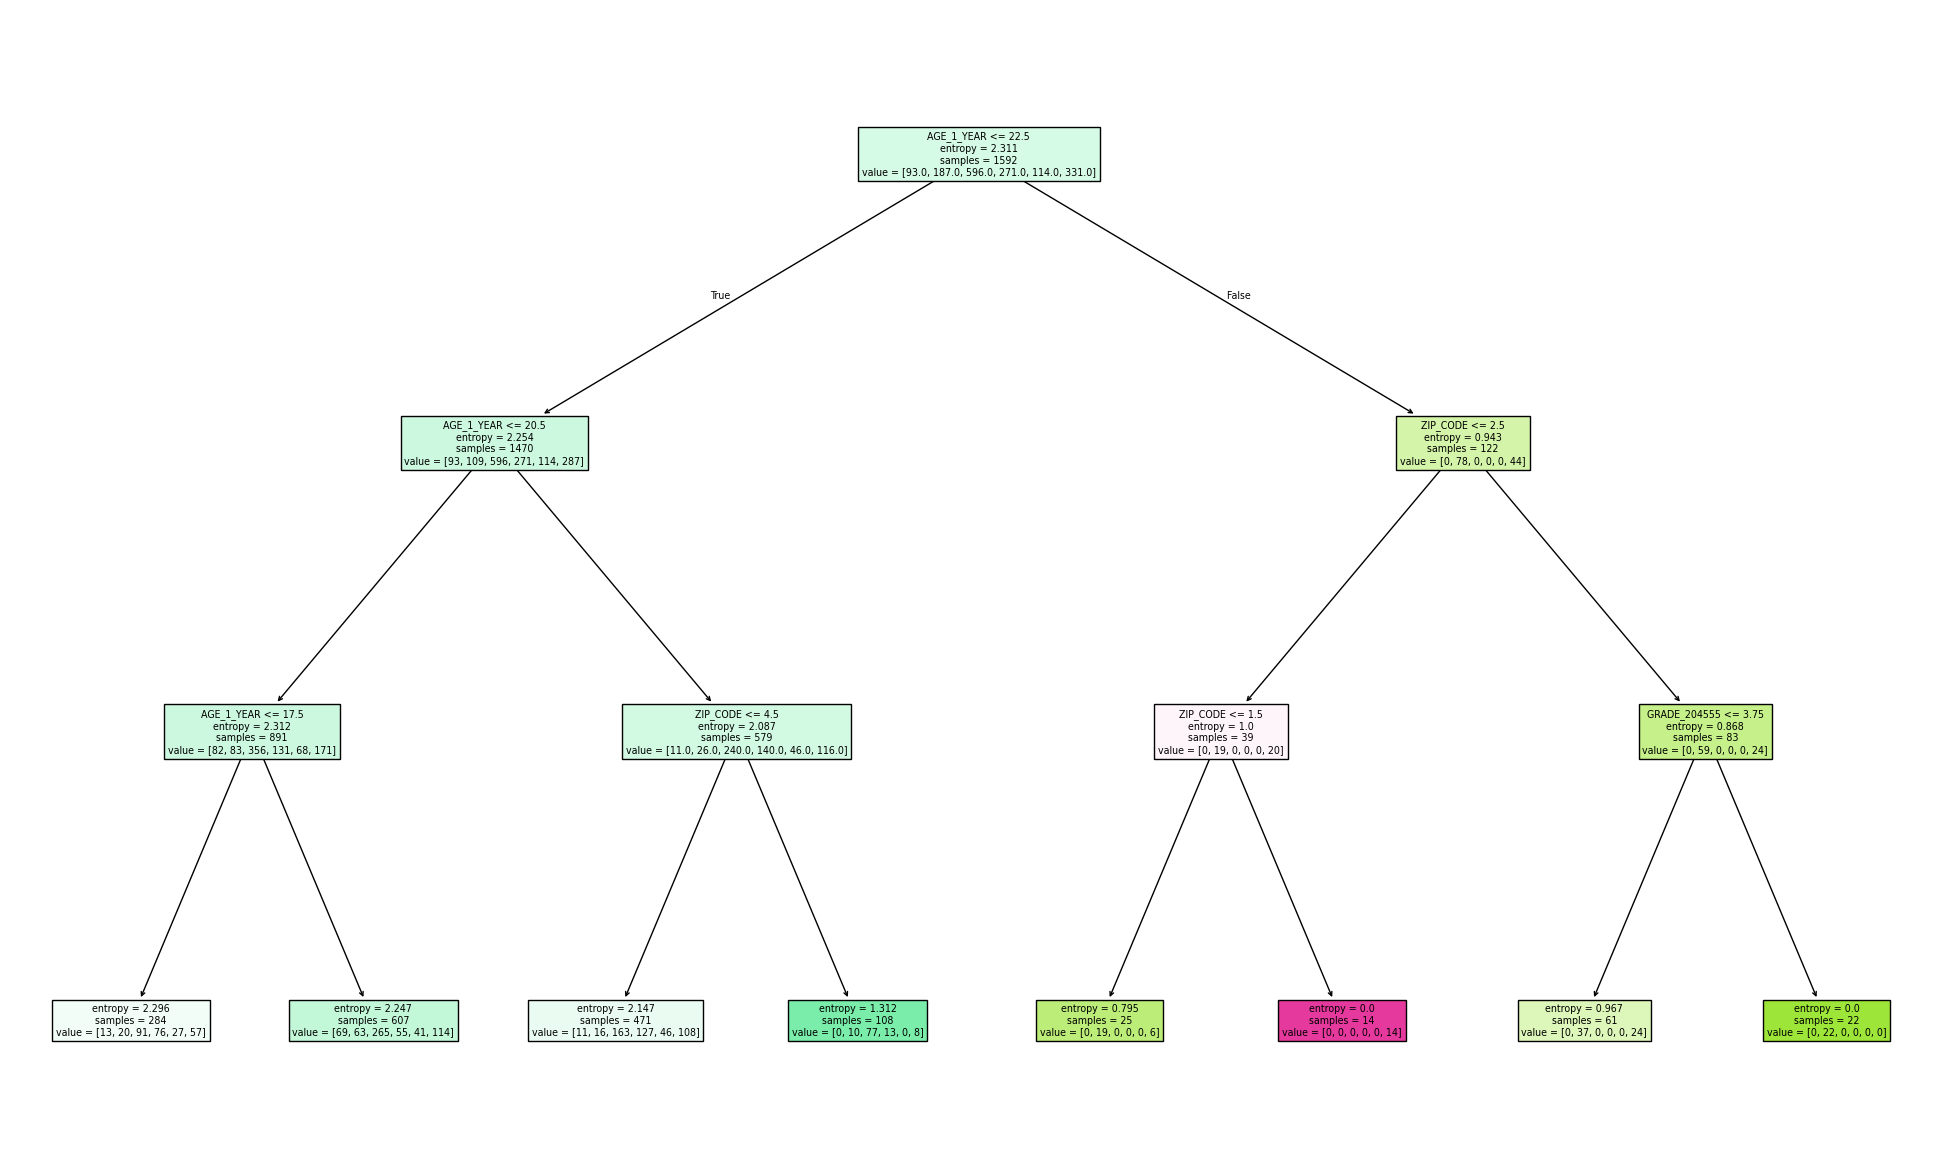

In [148]:
plt.figure(figsize=(25,15))
plot_tree(clf, filled=True, feature_names=X_train.columns)

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

X = good_students.drop('DEPARTMENT_ID', axis=1)
y = good_students['DEPARTMENT_ID']

# Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1_score': make_scorer(f1_score, average='weighted')
}

# Perform 10-fold cross-validation
cv_results = cross_validate(clf, X, y, cv=10, scoring=scoring)

# Print the results
print("Accuracy: ", cv_results['test_accuracy'].mean())
print("Precision: ", cv_results['test_precision'].mean())
print("Recall: ", cv_results['test_recall'].mean())
print("F1-score: ", cv_results['test_f1_score'].mean())

In [150]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature AGE_1_YEAR (0.788122)
2. feature ZIP_CODE (0.181691)
3. feature GRADE_204555 (0.030187)
4. feature GRADE_204666 (0.000000)
5. feature GRADE_204444 (0.000000)
6. feature GRADE_204333 (0.000000)
7. feature GRADE_204222 (0.000000)
8. feature GRADE_204111 (0.000000)
9. feature STATUS (0.000000)
10. feature GENDER (0.000000)
11. feature STUDENT_ID (0.000000)


In [151]:
# overall accuracy
print("Accuracy: ", cv_results['test_accuracy'].mean())

Accuracy:  0.4381909547738694


In [160]:
from sklearn.model_selection import cross_val_score,KFold,cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
scores = cross_val_score(clf, X, y, scoring='accuracy', cv = 10)
print(f"accuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))
y_pred = cross_val_predict(clf, X, y, cv=10)
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

accuracy: 0.43819 (+/- 0.02099)
[[  0   0 106   6   0   0]
 [  0 100 121  14   0   0]
 [  0   0 692  57   0   0]
 [  0   0 289  65   0   0]
 [  0   0 122  23   0   0]
 [  0  34 311  35   0  15]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       112
           2       0.75      0.43      0.54       235
           3       0.42      0.92      0.58       749
           4       0.33      0.18      0.23       354
           5       0.00      0.00      0.00       145
           6       1.00      0.04      0.07       395

    accuracy                           0.44      1990
   macro avg       0.42      0.26      0.24      1990
weighted avg       0.50      0.44      0.34      1990



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [161]:
# reason of precision
good_students['DEPARTMENT_ID'].value_counts()

,count
DEPARTMENT_ID,
3,749
6,395
4,354
2,235
5,145
1,112
